<a href="https://colab.research.google.com/github/ruedas91/FinTechruedas/blob/main/neural_network_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activating Your First Neural Network

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [3]:
# Generate 1000 demo data samples with 3 input features
# FYI here, n_informative is number of important, basically, clustered features.
# And n_redundant is how a class that is a linear combination of the others.
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1)

In [4]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,1.680097,-1.189006,1.271752,1
1,0.482902,-0.524869,0.565275,1
2,2.342775,-1.642313,1.756274,1
3,1.085315,0.754731,-0.839509,1
4,-1.633681,1.700706,-1.830596,0


### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Scale the data using the `StandarScaler`.

In [6]:
# Create scaler instance
X_scaler = StandardScaler()

In [7]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Neural Network Model Creation

In [9]:
# Create a sequential model
neuron = Sequential()

#### Add the first layer of our neural network.

In [10]:
# First layer
number_inputs = 3 #how many features will be taken in
number_hidden_nodes = 6

neuron.add(
    Dense(
        units=number_hidden_nodes,
        activation="relu",
        input_dim=number_inputs)
        )  


#### We finish creating our neural network by adding the output layer.


In [11]:
# Output layer
output_nodes = 1

neuron.add(
    Dense(
        units=output_nodes,
        activation="sigmoid")
        )

##### Instructor Added

## Neural Network Model Creation

![Simple neural network](../Images/simple-nn.png)

In [12]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [13]:
# Compile model
neuron.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
    )

### Fit the Model

In [14]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 4ms/step - loss: 0.9306 - accuracy: 0.4880
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.4880
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8296 - accuracy: 0.4920
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7871 - accuracy: 0.4920
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7494 - accuracy: 0.4933
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.7158 - accuracy: 0.5000
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5080
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.5133
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.5520
Epoch 10/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6068 - accuracy: 0.6133
Epoch 11/

### Evaluate the Model

#### Plotting the Loss Function and Accuracy

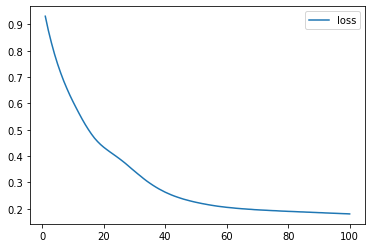

In [33]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

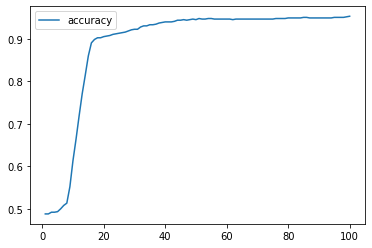

In [35]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [37]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1578 - accuracy: 0.9600 - 156ms/epoch - 19ms/step
Loss: 0.15782831609249115, Accuracy: 0.9599999785423279


 ### Making Predictions with New Data

In [18]:
# Create 10 new samples of dummy data


In [38]:
# Making predictions
# Making predictions
predictions = (neuron.predict(X_test_scaled) > 0.5).astype("int32")
results = pd. DataFrame({"predictions": predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

8/8 [==============================] - 0s 2ms/step


,predictions,actual
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,0,0


 ## Using a Single Neuron for Non-Linear Data

 ### Creating Demo Data

In [39]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [40]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [41]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df_moons.head()


,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


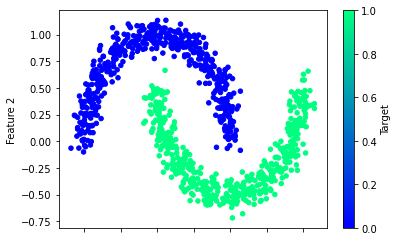

In [44]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [46]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=1
)

 Scale the data

In [47]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [48]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [49]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [51]:
## Create the sequential model
nn = Sequential()

In [52]:
## First layer
number_inputs = 2 
number_hidden_nodes = 6

nn.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [53]:
## Output layer
number_classes = 1

nn.add(Dense(units=number_classes, activation="sigmoid"))

In [55]:
## Model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [56]:
## Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

 ### Fit the Model

In [57]:
# Training the model with the non-linear data
model_moon = nn.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.7547
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7907
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8093
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8227
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.8267
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.8280
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8320
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.8373
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8413
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8453
Epoch 11/

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

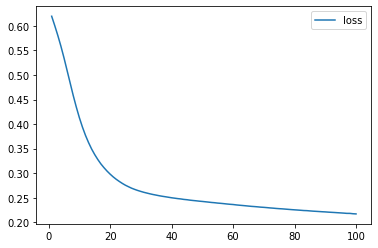

In [59]:
# Create a dataframe with the history dictionary
# Plot the loss
# Create a DataFrame with the history dictionary
df_moons = pd.DataFrame(model_moon.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_moons.plot(y="loss")

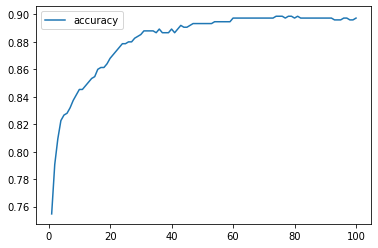

In [60]:
# Plot the accuracy
df_moons.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [61]:
# Evaluate the model using non-linear data
model_moon_loss, model_moon_accuracy = nn.evaluate(
    X_moon_test_scaled, y_moon_test, verbose=2
)
print(f"Loss: {model_moon_loss}, Accuracy: {model_moon_accuracy}")

8/8 - 0s - loss: 0.2228 - accuracy: 0.8920 - 138ms/epoch - 17ms/step
Loss: 0.22281616926193237, Accuracy: 0.8920000195503235


 ### Making Predictions

In [62]:
# Making predictions
predictions = (nn.predict(X_moon_test_scaled) > 0.5).astype("int32")
results = pd. DataFrame({"predictions": predictions.ravel(), "actual": y_moon_test.ravel()})
results.head(10)

8/8 [==============================] - 0s 2ms/step


,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0
